<a href="https://colab.research.google.com/github/Giuliana-24/PROYECTOS_SIC/blob/main/Proy1/Proyecto1_SIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO
En este proyecto vamos a desarrollar un proyecto a partir de la base de datos de IMBD.








##**1. Carga y limpieza de datos**

Utilizar pandas para cargar el dataset y realizar la limpieza básica de datos (manejo de valores nulos, tipos de datos).



---



##Paso 1: Carga de datos

Importar las librerías, cargar el archivo .csv y mostrar el dataframe.

In [ ]:
!wget https://raw.githubusercontent.com/CVasquezroque/SCI-IA2024/main/imdb_top_1000.csv

--2024-07-29 02:17:04--  https://raw.githubusercontent.com/CVasquezroque/SCI-IA2024/main/imdb_top_1000.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 438096 (428K) [text/plain]
Saving to: ‘imdb_top_1000.csv’

imdb_top_1000.csv   100%[===================>] 427.83K  --.-KB/s    in 0.005s  

2024-07-29 02:17:04 (81.0 MB/s) - ‘imdb_top_1000.csv’ saved [438096/438096]



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df =pd.read_csv('imdb_top_1000.csv')


Mostramos las 5 primeras filas del archivo.

In [ ]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## Paso 2: Tipos de datos
Verificación y correción de los tipos de datos.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


Coversión de datos:


In [ ]:
# Identificar valores no numéricos
non_numeric_values = df[~df['Released_Year'].str.isnumeric()]['Released_Year'].unique()

# Eliminar filas con valores no numéricos en 'Released_Year'
df = df[df['Released_Year'].str.isnumeric()]

# Convertir la columna 'Released_Year' a tipo int utilizando .loc para evitar SettingWithCopyWarning
df.loc[:, 'Released_Year'] = df['Released_Year'].astype(int)

In [ ]:
#Convertir la columna 'Runtime' a tipo Int sin la palabra "min" para poder hacer calculos
df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(int)

In [ ]:
#Convertir la columna 'Gross' a tipo String
df['Gross'] = df['Gross'].astype(str)

In [ ]:
# Convertir la columna 'Gross' a numérico, forzando errores a NaN
df['Gross'] = pd.to_numeric(df['Gross'].str.replace(',', ''), errors='coerce')

In [ ]:
df.d

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

##Paso 3: Manejo de datos Nan
Visualización y reemplazo de datos faltantes.

In [ ]:
# Identificar valores faltantes por columna
d_faltantes= df.isnull().sum(axis=0)
fa=d_faltantes.reset_index()
fa.columns=['Variable','Cantidad Nan']
fa

,Variable,Cantidad Nan
0,Poster_Link,0
1,Series_Title,0
2,Released_Year,0
3,Certificate,101
4,Runtime,0
5,Genre,0
6,IMDB_Rating,0
7,Overview,0
8,Meta_score,157
9,Director,0


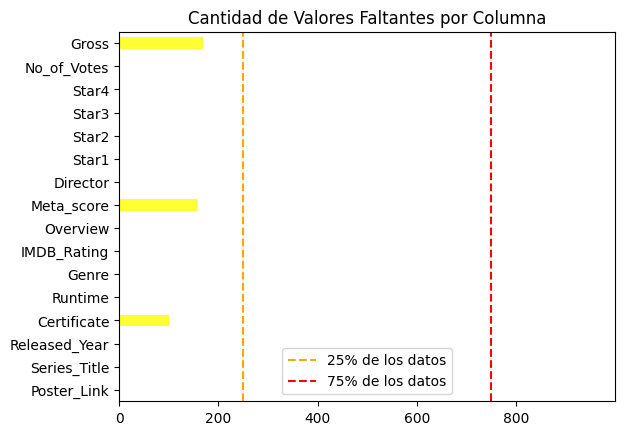

In [ ]:
# Visualización de valores faltantes con barhplots
d_faltantes.plot(kind='barh', color='yellow', alpha=0.8)

plt.axvline(len(df)*0.25, color='orange', linestyle='--', label= '25% de los datos')
plt.axvline(len(df)*0.75, color='red', linestyle='--', label= '75% de los datos')

# Ajustar los límites del eje y para que se muestren correctamente
plt.xlim(0, len(df))

plt.title('Cantidad de Valores Faltantes por Columna')
plt.legend()
plt.tight_layout
plt.show()

Al mostrar se observa que tenemos datos faltantes en 3 de las columnas, de las cuales, una es categórica, y los demás son numericos.

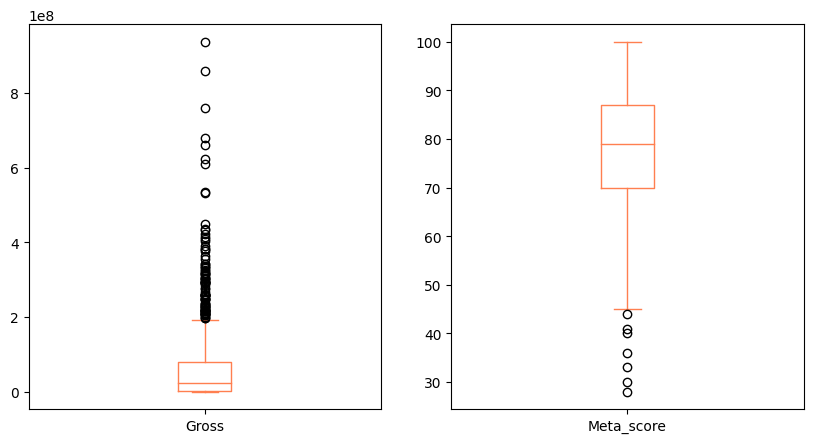

In [ ]:
#Verificar si hay valores atipicos
colum=['Gross','Meta_score']
# Boxplot para visualizar si existen valores atipicos
df[colum].plot(kind='box', subplots = True, figsize=(10,5), color='coral')
plt.show()

### ¿Tenemos valores atípicos? ¿Cuál método será la mejor opción?


---

Existen tres soluciones optimas


*   Moda: Para valores categóricos
*   Media: Para valores numericos
*   Mediana: Para valoresnumericos con datos atipicos.



In [ ]:
#remplazo de valores faltantes
df['Certificate'].fillna(df['Certificate'].mode()[0], inplace=True)

df['Gross'].fillna(df['Gross'].median(), inplace=True)

df['Meta_score'].fillna(df['Meta_score'].median(), inplace=True)


In [ ]:
# Identificar valores faltantes por columna
d_faltantes= df.isnull().sum(axis=0)

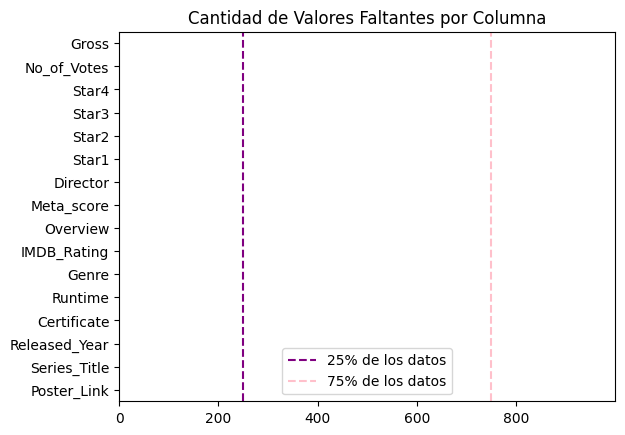

In [ ]:
# Visualización de valores faltantes con barhplots
d_faltantes.plot(kind='barh', color='yellow', alpha=0.8)

plt.axvline(len(df)*0.25, color='purple', linestyle='--', label= '25% de los datos')
plt.axvline(len(df)*0.75, color='pink', linestyle='--', label= '75% de los datos')

# Ajustar los límites del eje y para que se muestren correctamente
plt.xlim(0, len(df))

plt.title('Cantidad de Valores Faltantes por Columna')
plt.legend()
plt.tight_layout
plt.show()

## **2.	Análisis exploratorio de datos (EDA):**

Calcular estadísticas descriptivas básicas.

Generar gráficos con matplotlib para visualizar la relación entre las variables.

In [ ]:
df.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,999.000000,999.000000,9.990000e+02,9.990000e+02
mean,122.873874,7.949650,78.134134,2.736974e+05,6.038774e+07
std,28.102520,0.275407,11.373863,3.275366e+05,1.014110e+08
min,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,103.000000,7.700000,72.000000,5.547150e+04,5.011838e+06
50%,119.000000,7.900000,79.000000,1.383560e+05,2.345744e+07
75%,137.000000,8.100000,85.500000,3.744775e+05,6.139004e+07
max,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


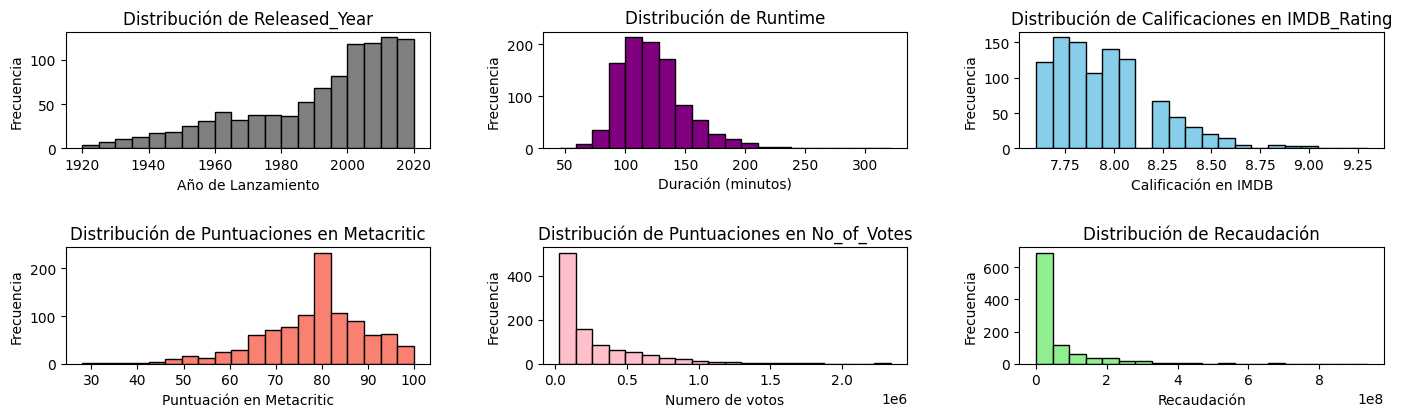

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 5))
fig.tight_layout(pad=5.0)

# Histograma de Año de Lanzamiento
axs[0, 0].hist(df['Released_Year'], bins=20, edgecolor='black', color='grey')
axs[0, 0].set_title('Distribución de Released_Year')
axs[0, 0].set_xlabel('Año de Lanzamiento')
axs[0, 0].set_ylabel('Frecuencia')

# Histograma de Duración
axs[0, 1].hist(df['Runtime'], bins=20, edgecolor='black', color='purple')
axs[0, 1].set_title('Distribución de Runtime')
axs[0, 1].set_xlabel('Duración (minutos)')
axs[0, 1].set_ylabel('Frecuencia')

# Histograma de Calificaciones en IMDB
axs[0, 2].hist(df['IMDB_Rating'], bins=20, edgecolor='black', color='skyblue')
axs[0, 2].set_title('Distribución de Calificaciones en IMDB_Rating')
axs[0, 2].set_xlabel('Calificación en IMDB')
axs[0, 2].set_ylabel('Frecuencia')

# Histograma de Puntuaciones en Metacritic
axs[1, 0].hist(df['Meta_score'].dropna(), bins=20, edgecolor='black', color='salmon')
axs[1, 0].set_title('Distribución de Puntuaciones en Metacritic')
axs[1, 0].set_xlabel('Puntuación en Metacritic')
axs[1, 0].set_ylabel('Frecuencia')

# Histograma de Puntuaciones en N de votos
axs[1, 1].hist(df['No_of_Votes'], bins=20, edgecolor='black', color='pink')
axs[1, 1].set_title('Distribución de Puntuaciones en No_of_Votes')
axs[1, 1].set_xlabel('Numero de votos')
axs[1, 1].set_ylabel('Frecuencia')

# Histograma de Recaudación Bruta
axs[1, 2].hist(df['Gross'], bins=20, edgecolor='black', color='lightgreen')
axs[1, 2].set_title('Distribución de Recaudación')
axs[1, 2].set_xlabel('Recaudación')
axs[1, 2].set_ylabel('Frecuencia')


# Mostrar la figura
plt.show()

Kurtosis y Skewness

In [ ]:
kur= df[['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']].kurtosis()
kur=kur.reset_index()
kur.columns=['Columna','Kurtosis']
kur

,Columna,Kurtosis
0,Released_Year,-0.021432
1,Runtime,3.427453
2,IMDB_Rating,1.434824
3,Meta_score,1.084024
4,No_of_Votes,6.885113
5,Gross,17.310376


In [ ]:
ske = df[['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']].skew()
ske=ske.reset_index()
ske.columns=['Columna','Skewness']
ske

,Columna,Skewness
0,Released_Year,-0.939347
1,Runtime,1.209585
2,IMDB_Rating,1.017150
3,Meta_score,-0.700465
4,No_of_Votes,2.298823
5,Gross,3.509874


Analisis y distribución de variables categóricas

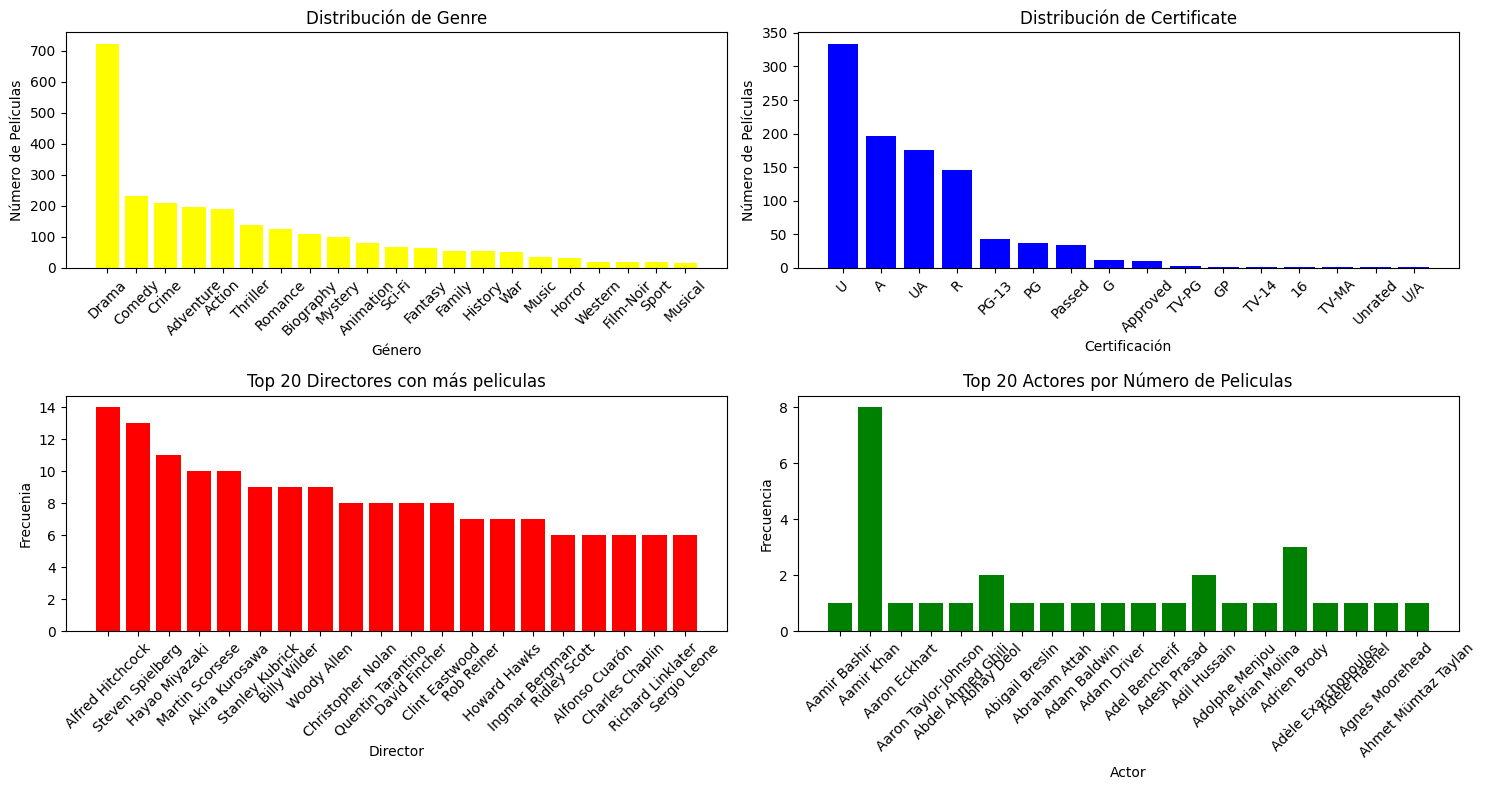

In [ ]:
# Géneros
df['Genre_List'] = df['Genre'].apply(lambda x: [genre.strip() for genre in x.split(',')])
genres_expanded = df['Genre_List'].explode()
genre_counts = genres_expanded.value_counts()

# Certificaciones
certificate_counts = df['Certificate'].value_counts()

# Directores (solo los primeros 10 directores para evitar gráficos sobrecargados)
director_counts = df['Director'].value_counts().head(20)

# Actores principales (considerando los primeros 10 actores más frecuentes en Star1, Star2, Star3 y Star4)
actors = df[['Star1', 'Star2', 'Star3', 'Star4']].apply(pd.Series.value_counts).sum(axis=1)
top_actors = actors.head(20)

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(15,8))
fig.tight_layout(pad=5.0)

# Subplot para Distribución de Géneros
axs[0, 0].bar(genre_counts.index, genre_counts.values, color='yellow')
axs[0, 0].set_title('Distribución de Genre')
axs[0, 0].set_xlabel('Género')
axs[0, 0].set_ylabel('Número de Películas')
axs[0, 0].tick_params(axis='x', rotation=45)

# Subplot para Distribución de Certificaciones
axs[0, 1].bar(certificate_counts.index, certificate_counts.values, color='blue')
axs[0, 1].set_title('Distribución de Certificate')
axs[0, 1].set_xlabel('Certificación')
axs[0, 1].set_ylabel('Número de Películas')
axs[0, 1].tick_params(axis='x', rotation=45)

# Subplot para Top 10 Directores
axs[1, 0].bar(director_counts.index, director_counts.values, color='red')
axs[1, 0].set_title('Top 20 Directores con más peliculas')
axs[1, 0].set_xlabel('Director')
axs[1, 0].set_ylabel('Frecuenia')
axs[1, 0].tick_params(axis='x', rotation=45)

# Subplot para Top 10 Actores Principales
axs[1, 1].bar(top_actors.index, top_actors.values, color='green')
axs[1, 1].set_title('Top 20 Actores por Número de Peliculas')
axs[1, 1].set_xlabel('Actor')
axs[1, 1].set_ylabel('Frecuencia')
axs[1, 1].tick_params(axis='x', rotation=45)

# Mostrar la figura
plt.tight_layout()
plt.show()

Relacion entre variables

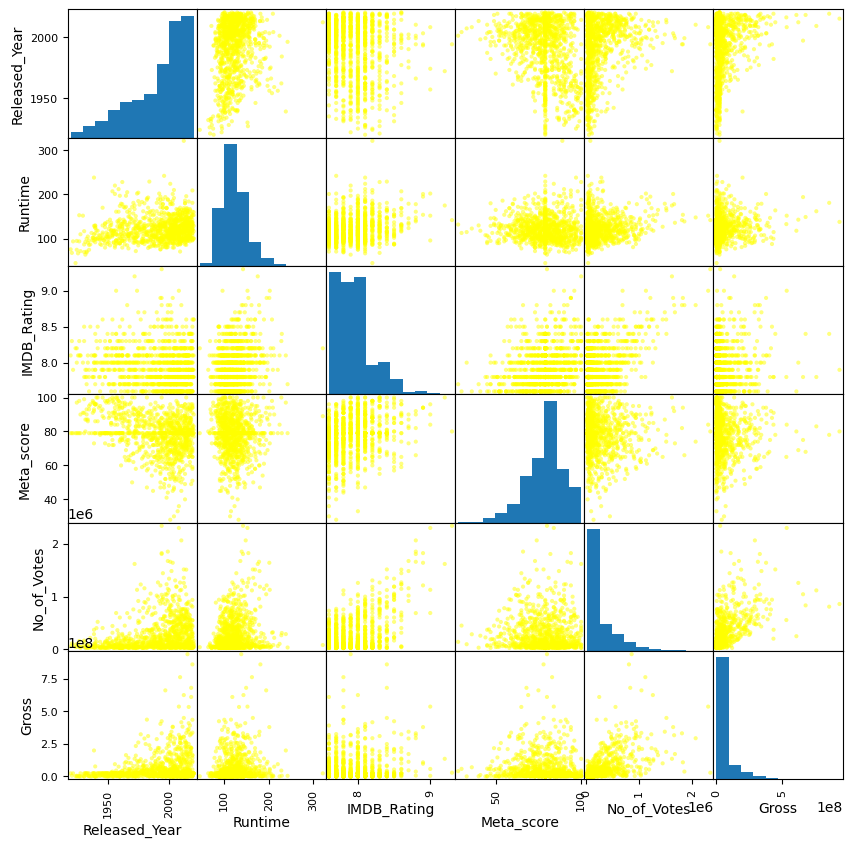

In [ ]:
pd.plotting.scatter_matrix(df, color='yellow',figsize=(10, 10))
plt.show()

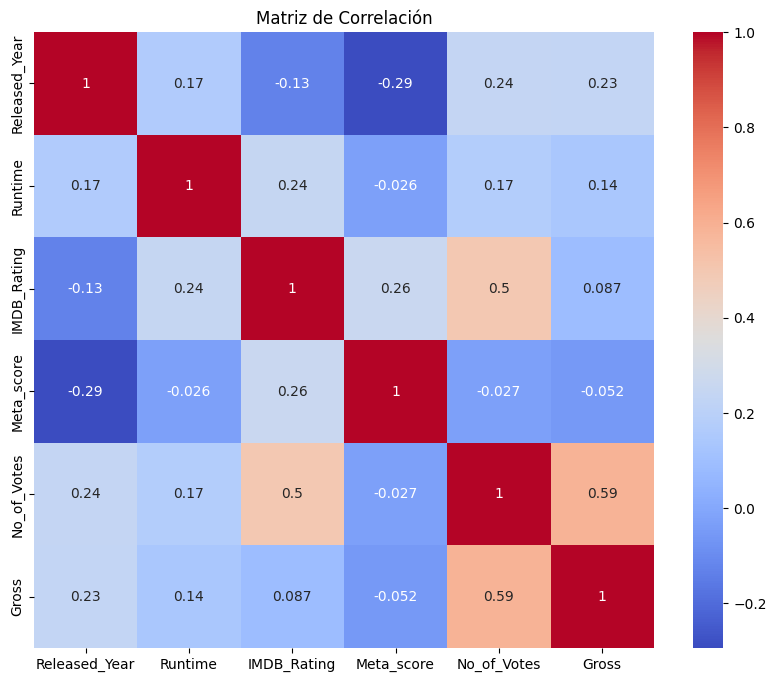

In [ ]:
# Correlación entre variables numéricas
plt.figure(figsize=(10, 8))
correlacion = df[['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']].corr()
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()



---



## **4. PREGUNTAS EAD**

#### *¿Qué directores tienden a generar mayores ingresos en taquilla?*

In [ ]:
gru_dic = df.groupby('Director')
resul = gru_dic['Gross'].sum().sort_values(ascending=False)
mr=resul.reset_index()
mr.head()

,Director,Gross
0,Steven Spielberg,2.478133e+09
1,Anthony Russo,2.205039e+09
2,Christopher Nolan,1.937454e+09
3,James Cameron,1.748237e+09
4,Peter Jackson,1.597312e+09


<Axes: ylabel='Director'>

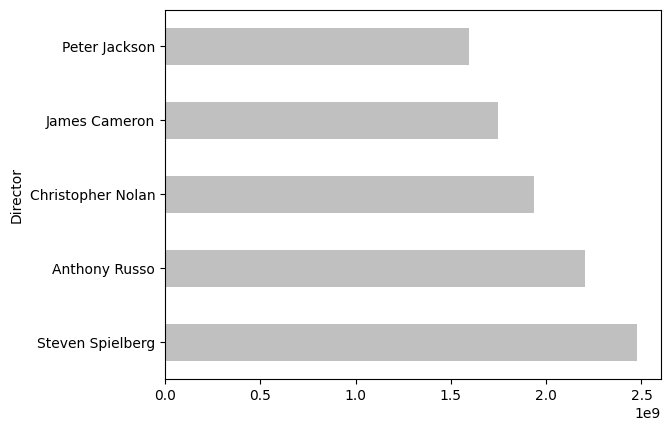

In [ ]:
resul.head().plot(kind='barh', color='silver')

#### *¿Qué directores tienden a recibir más votos en IMDB?*

In [ ]:
gru_dic = df.groupby('Director')
votos = gru_dic['No_of_Votes'].sum().sort_values(ascending=False)
mv=votos.reset_index()
mv.head()

,Director,No_of_Votes
0,Christopher Nolan,11578345
1,Quentin Tarantino,8123208
2,Steven Spielberg,7817166
3,David Fincher,6607859
4,Martin Scorsese,6513530


<Axes: xlabel='Director'>

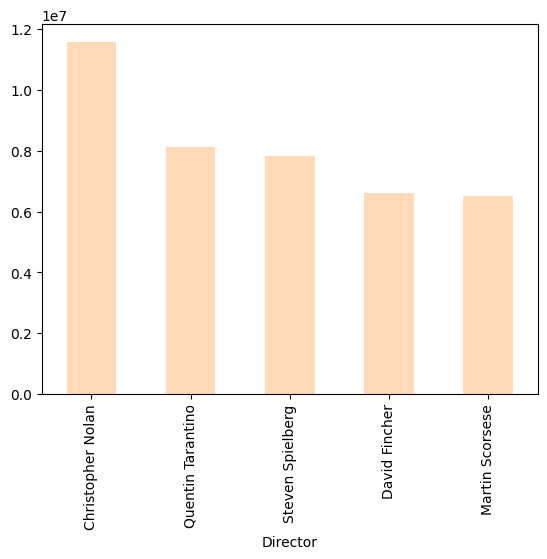

In [ ]:
votos.head().plot(kind='bar', color='peachpuff')

####*¿Qué actores están asociados con películas que generan mayores ingresos?*

In [ ]:
actores_df = df.melt(id_vars=['Gross'], value_vars=['Star1', 'Star2', 'Star3', 'Star4'],
                    var_name='Star', value_name='Actor')
actor_ing = actores_df.groupby('Actor')['Gross'].sum().sort_values(ascending=False)
actor_ing.head()

Actor
Robert Downey Jr.      3.129073e+09
Tom Hanks              2.729727e+09
Chris Evans            2.339664e+09
Joe Russo              2.205039e+09
Mark Ruffalo           2.081853e+09
                           ...     
Sarah Polley           3.600000e+03
Jan Josef Liefers      3.296000e+03
Til Schweiger          3.296000e+03
Thierry van Werveke    3.296000e+03
Nicolas Bro            1.305000e+03
Name: Gross, Length: 2709, dtype: float64

<Axes: ylabel='Actor'>

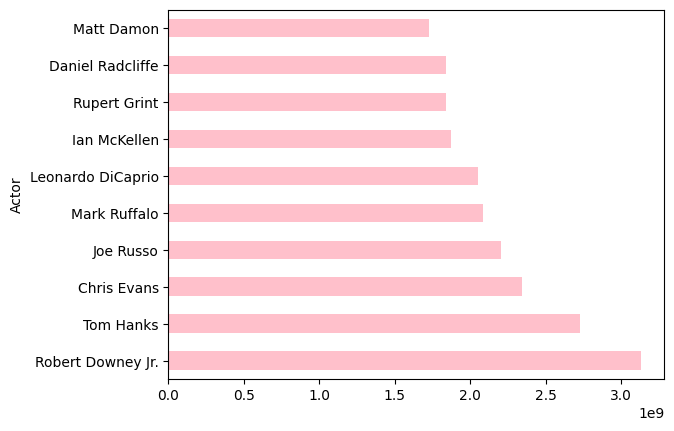

In [ ]:
actor_ing.head(10).plot(kind='barh', color='pink')

####*¿Qué actores están asociados con películas que reciben más votos?*

In [ ]:
vot_act = df.melt(id_vars=['No_of_Votes'], value_vars=['Star1', 'Star2', 'Star3', 'Star4'],
                    var_name='Star', value_name='Actor')
votos_actor = vot_act.groupby('Actor')['No_of_Votes'].sum().sort_values(ascending=False)
votos_actor.head()


Actor
Leonardo DiCaprio    10782195
Brad Pitt             9144728
Tom Hanks             9104962
Christian Bale        8565922
Robert De Niro        7787234
Name: No_of_Votes, dtype: int64

<Axes: ylabel='Actor'>

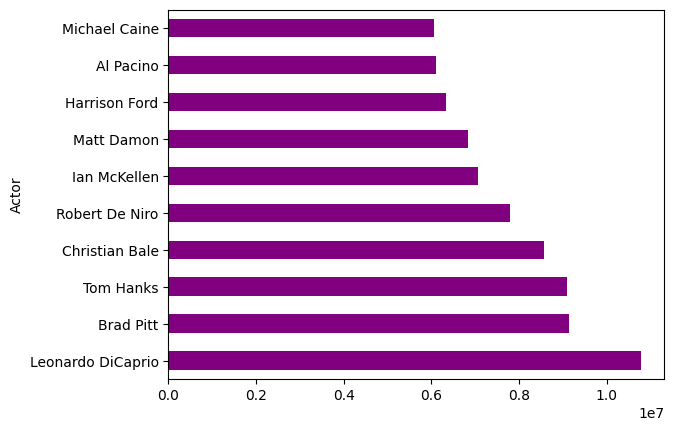

In [ ]:
votos_actor.head(10).plot(kind='barh', color='purple')

#**3. Modelado Matemático**

In [ ]:
# Definir la función de costo
def compute_cost(X, Y, W, b):
    m = len(Y)
    cost = np.sum((W * X + b - Y) ** 2) / (2*m)
    return cost

In [ ]:
def gradient_descent(X, Y, W, b, learning_rate, iterations):
    m = len(Y)
    for i in range(iterations):
        # Calcular las predicciones (hipótesis)
        Y_pred = W * X + b

        # Calcular las derivadas
        dW = -1/m * np.sum(X * (Y - Y_pred))
        db = -1/m * np.sum(Y - Y_pred)

        # Actualizar los parámetros
        W = W - learning_rate * dW
        b = b - learning_rate * db

        # Calcular el costo
        cost = compute_cost(X, Y, W, b)

    return W, b

## **Preguntas**

### **Duración de la Película y su Calificación IMDB:**



* Pregunta: ¿Cómo influye la duración de una película en su calificación IMDB?
* Justificación: Explorar si la duración de la película tiene un efecto significativo en cómo es valorada por el público.



#### Paso 1

In [ ]:
# Seleccionar las columnas relevantes
data = df[['Runtime', 'IMDB_Rating']]

# Extraer las características y la variable objetivo
X = data['Runtime'].values
Y = data['IMDB_Rating'].values

#### Paso 2

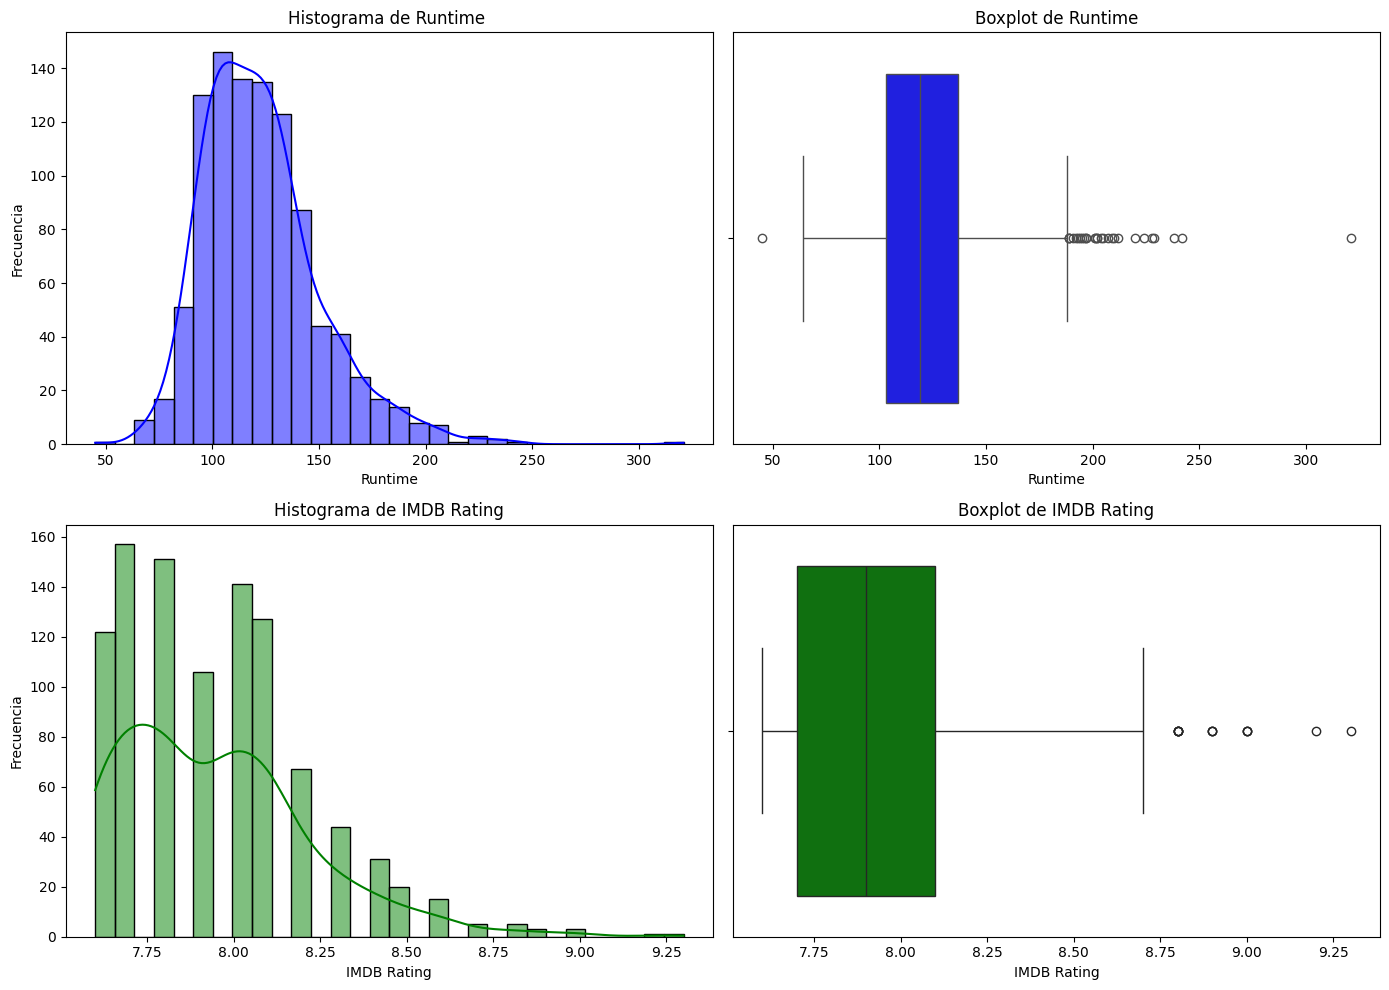

In [ ]:
# Configurar la figura con 2 filas y 2 columnas
plt.figure(figsize=(14, 10))

# Histograma y KDE de Runtime
plt.subplot(2, 2, 1)
sns.histplot(X, bins=30, kde=True, color='blue')
plt.xlabel('Runtime')
plt.ylabel('Frecuencia')
plt.title('Histograma de Runtime ')

# Boxplot de Runtime
plt.subplot(2, 2, 2)
sns.boxplot(x=X, color='blue')
plt.xlabel('Runtime')
plt.title('Boxplot de Runtime')

# Histograma y KDE de IMDB Rating
plt.subplot(2, 2, 3)
sns.histplot(Y, bins=30, kde=True, color='green')
plt.xlabel('IMDB Rating')
plt.ylabel('Frecuencia')
plt.title('Histograma de IMDB Rating')

# Boxplot de IMDB Rating
plt.subplot(2, 2, 4)
sns.boxplot(x=Y, color='green')
plt.xlabel('IMDB Rating')
plt.title('Boxplot de IMDB Rating')

plt.tight_layout()
plt.show()

In [ ]:
# Detección de valores atípicos utilizando el método IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Eliminar valores atípicos
data_cleaned = data[~((data < (lower_bound)) |
               (data > (upper_bound))).any(axis=1)]

# Extraer las características y la variable objetivo de los datos limpios
X = data_cleaned['Runtime'].values
Y = data_cleaned['IMDB_Rating'].values

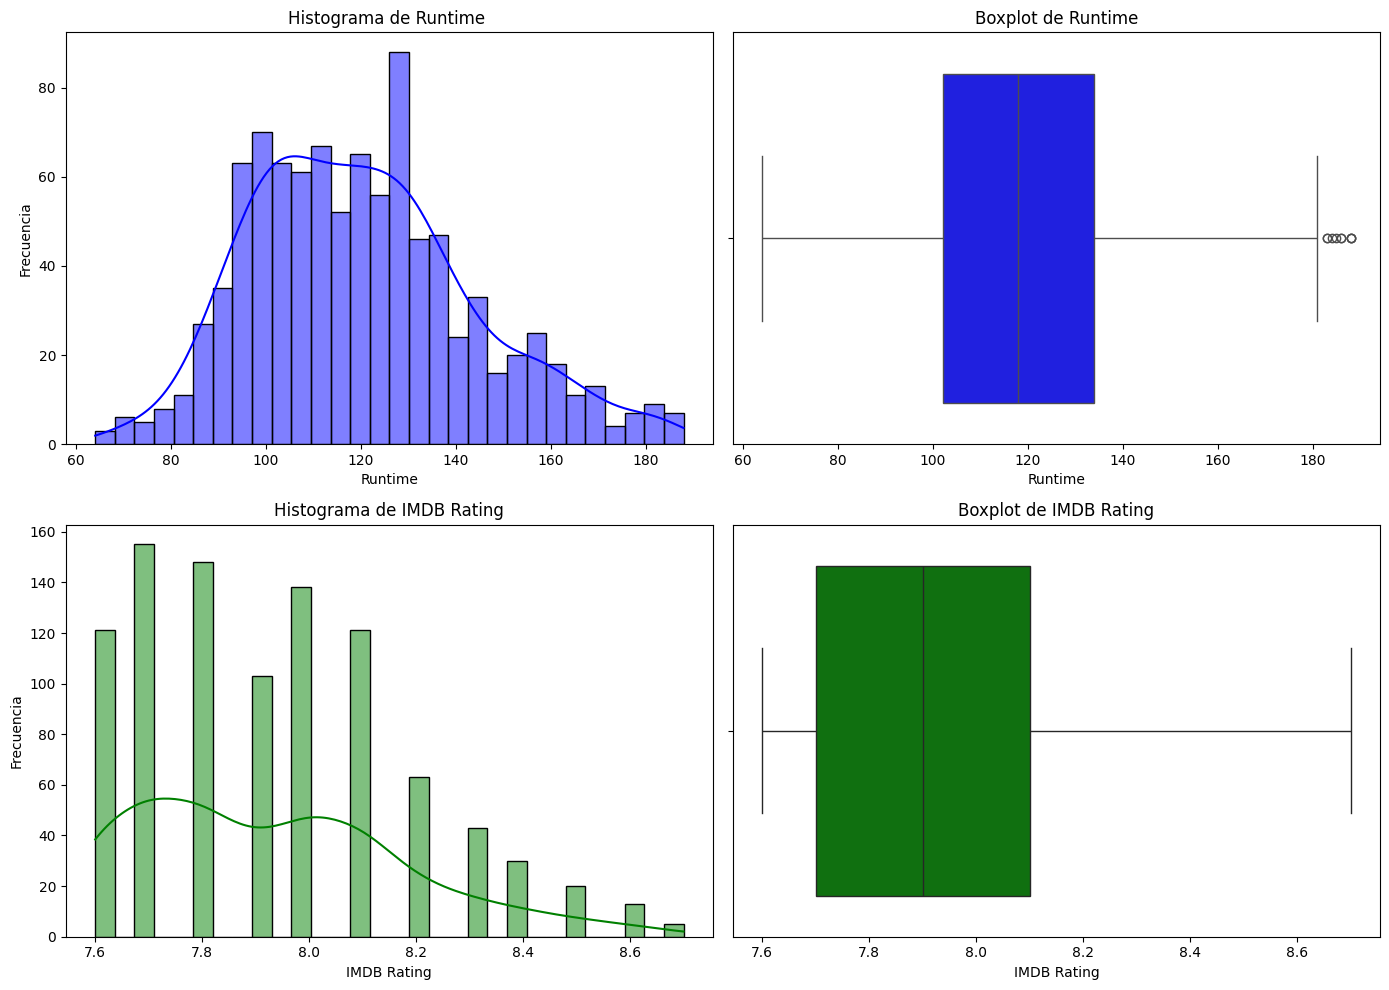

In [ ]:
# Configurar la figura con 2 filas y 2 columnas
plt.figure(figsize=(14, 10))

# Histograma y KDE de Runtime
plt.subplot(2, 2, 1)
sns.histplot(X, bins=30, kde=True, color='blue')
plt.xlabel('Runtime')
plt.ylabel('Frecuencia')
plt.title('Histograma de Runtime ')

# Boxplot de Runtime
plt.subplot(2, 2, 2)
sns.boxplot(x=X, color='blue')
plt.xlabel('Runtime')
plt.title('Boxplot de Runtime')

# Histograma y KDE de IMDB Rating
plt.subplot(2, 2, 3)
sns.histplot(Y, bins=30, kde=True, color='green')
plt.xlabel('IMDB Rating')
plt.ylabel('Frecuencia')
plt.title('Histograma de IMDB Rating')

# Boxplot de IMDB Rating
plt.subplot(2, 2, 4)
sns.boxplot(x=Y, color='green')
plt.xlabel('IMDB Rating')
plt.title('Boxplot de IMDB Rating')

plt.tight_layout()
plt.show()

In [ ]:
# Normalizar las características
X = (X - np.mean(X)) / np.std(X)

# Normalizar la variable objetivo
Y = (Y - np.mean(Y)) / np.std(Y)

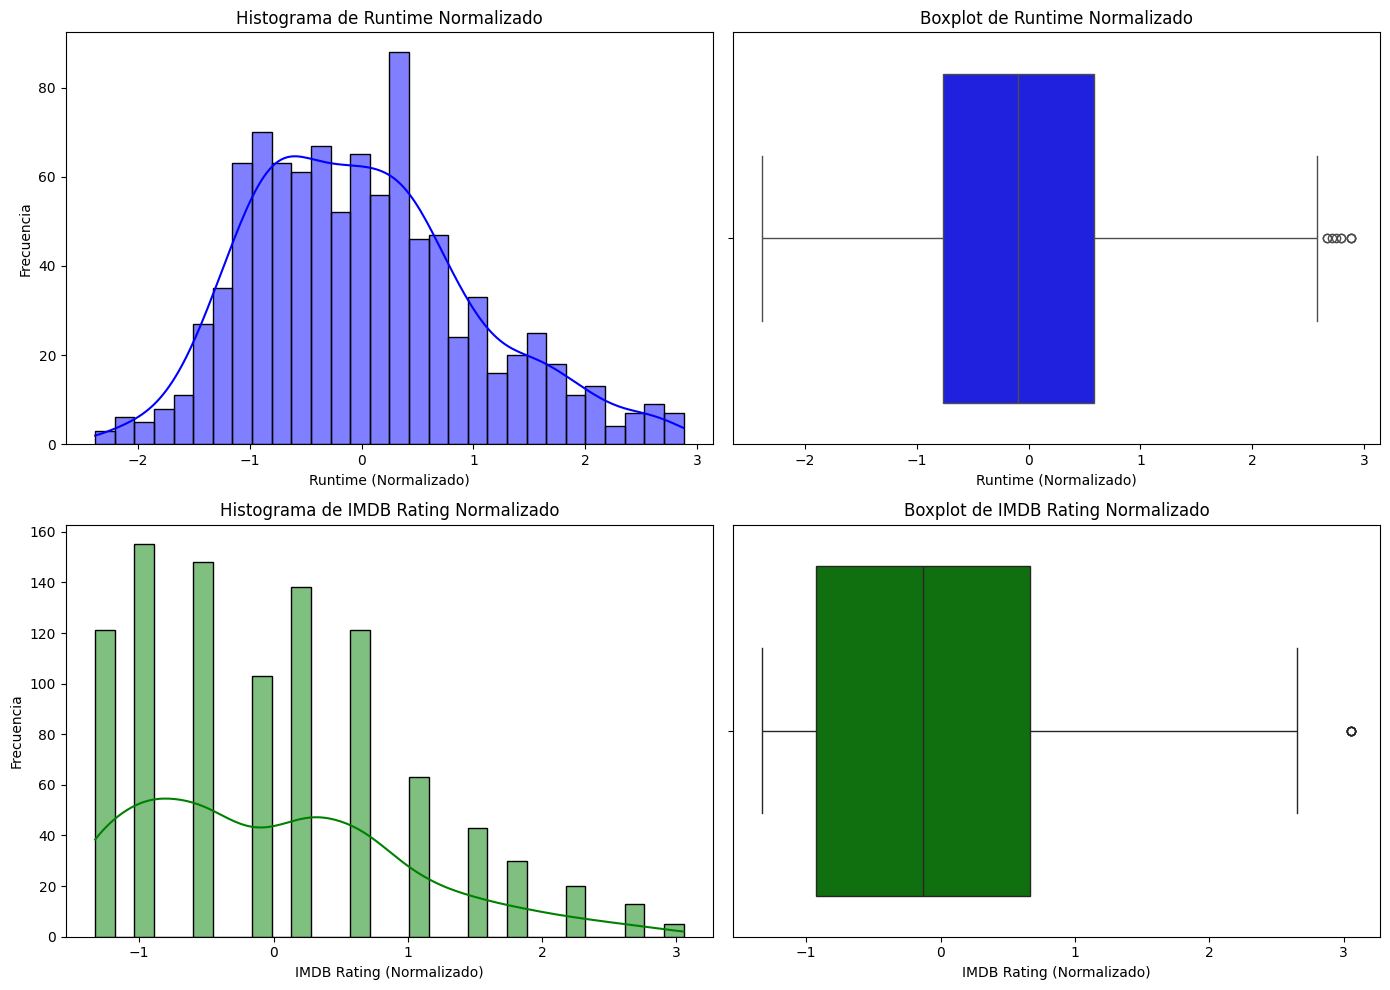

In [ ]:
# Configurar la figura con 2 filas y 2 columnas
plt.figure(figsize=(14, 10))

# Histograma y KDE de Runtime Normalizado
plt.subplot(2, 2, 1)
sns.histplot(X, bins=30, kde=True, color='blue')
plt.xlabel('Runtime (Normalizado)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Runtime Normalizado')

# Boxplot de Runtime Normalizado
plt.subplot(2, 2, 2)
sns.boxplot(x=X, color='blue')
plt.xlabel('Runtime (Normalizado)')
plt.title('Boxplot de Runtime Normalizado')

# Histograma y KDE de IMDB Rating Normalizado
plt.subplot(2, 2, 3)
sns.histplot(Y, bins=30, kde=True, color='green')
plt.xlabel('IMDB Rating (Normalizado)')
plt.ylabel('Frecuencia')
plt.title('Histograma de IMDB Rating Normalizado')

# Boxplot de IMDB Rating Normalizado
plt.subplot(2, 2, 4)
sns.boxplot(x=Y, color='green')
plt.xlabel('IMDB Rating (Normalizado)')
plt.title('Boxplot de IMDB Rating Normalizado')

plt.tight_layout()
plt.show()

#### Paso 3

In [ ]:
# Inicializar los parámetros
W = 0
b = 0

#### Paso 4

In [ ]:
# Verificar si hay valores nulos o infinitos en X o Y
print("Valores nulos en X:", np.isnan(X).sum())
print("Valores infinitos en X:", np.isinf(X).sum())
print("Valores nulos en Y:", np.isnan(Y).sum())
print("Valores infinitos en Y:", np.isinf(Y).sum())

Valores nulos en X: 0
Valores infinitos en X: 0
Valores nulos en Y: 0
Valores infinitos en Y: 0


#### Paso 5

W: 0.12697424379756936, b: 1.7150133165463195e-15


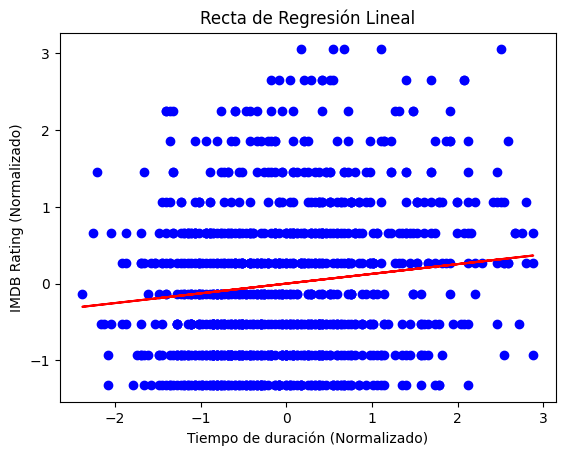

In [ ]:
# Definir los hiperparámetros
learning_rate = 0.001
iterations = 1000

# Entrenar el modelo
W, b = gradient_descent(X, Y, W, b, learning_rate, iterations)
print(f"W: {W}, b: {b}")


# Visualización de la Recta de Regresión
plt.scatter(X, Y, color='blue')
plt.plot(X, W * X + b, color='red')
plt.xlabel('Tiempo de duración (Normalizado)')
plt.ylabel('IMDB Rating (Normalizado)')
plt.title('Recta de Regresión Lineal')
plt.show()

#### Paso 6

In [ ]:
# Definir la función para calcular el RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Calcular las predicciones
y_pred = np.dot(X, W)

# Calcular el RMSE
error = rmse(Y, y_pred)
print(f"RMSE del modelo: {error}")

RMSE del modelo: 0.9824085688189353


#### Resultados

*   **Influencia de la Duración:** La duración de la película tiene una influencia muy leve en la calificación de IMDB. La pendiente de la línea de regresión es positiva pero muy pequeña, lo que sugiere que, en promedio, películas más largas tienden a tener calificaciones ligeramente más altas, pero este efecto es muy débil.
*   **Modelo de Regresión:** La gran dispersión de los datos alrededor de la línea de regresión y el valor moderado del RMSE indican que la duración de la película no es un buen predictor de la calificación de IMDB. Otros factores no considerados en este modelo probablemente tienen una mayor influencia en las calificaciones de IMDB.

### ¿Qué combinación de 2 variables cuantitativas proporciona un valor de RMSE más bajo?

In [ ]:
# Definir la función para calcular el RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Selección de columnas relevantes
columns = ['Released_Year', 'Runtime', 'Meta_score',
           'No_of_Votes', 'Gross', 'IMDB_Rating']
data = df[columns]

# Calcular la correlación de cada variable con la calificación de IMDB
correlation_matrix = data.corr()
# print(correlation_matrix['Gross'].sort_values(ascending=False))

# Inicializar los hiperparámetros
learning_rate = 0.001
iterations = 1000

# Lista de características a evaluar
features = ['Released_Year', 'Meta_score', 'Runtime',
            'No_of_Votes', 'IMDB_Rating']

# Almacenar los resultados
results = []
W_values = []
b_values = []
rmse_values = []

# Evaluar cada característica
for feature in features:
    # Extraer la característica y la variable objetivo
    X = data[feature].values
    Y = data['Gross'].values

    # Normalización de los datos
    X_normalized = (X - np.mean(X)) / np.std(X)
    Y_normalized = (Y - np.mean(Y)) / np.std(Y)

    # Inicializar los parámetros
    W = 0
    b = 0

    # Entrenar el modelo utilizando la función de descenso de gradiente
    W, b = gradient_descent(X_normalized,
           Y_normalized, W, b, learning_rate, iterations)

    # Realizar predicciones
    Y_pred = W * X_normalized + b

    # Calcular el RMSE
    error = rmse(Y_normalized, Y_pred)

    # Almacenar los resultados en las listas
    W_values.append(W)
    b_values.append(b)
    rmse_values.append(error)

    # Almacenar el resultado en el diccionario
    results.append({
        "Característica": feature,
        "W": W,
        "b": b,
        "RMSE": error
    })

# Crear el DataFrame a partir de los resultados
df_results = pd.DataFrame(results)

# Mostrar el DataFrame
df_results

,Característica,W,b,RMSE
0,Released_Year,0.147079,6.412744e-17,0.976324
1,Meta_score,-0.032776,1.167346e-17,0.998838
2,Runtime,0.087133,8.715529e-18,0.991755
3,No_of_Votes,0.372340,1.077016e-17,0.836734
4,IMDB_Rating,0.055044,8.026501e-17,0.996718


#### Resultado

*   Nuestro análisis ha revelado que el número de votos (No_of_Votes) es el mejor predictor de los ingresos brutos (Gross) de una película. Aquí están los resultados clave de nuestro modelo de regresión lineal:


#### Conclusiones

* No_of_Votes es la mejor variable predictiva de Gross con el RMSE más bajo de 0.836734.
* Las demás variables (Released_Year, Meta_score, Runtime, IMDB_Rating) tienen RMSE altos, lo que indica que no son buenos predictores cuando se consideran individualmente.

#### Recomendaciones

* Para mejorar aún más el modelo, se podrían considerar combinaciones de variables. Por ejemplo, No_of_Votes junto con otras variables que también influyen, pero en menor medida, podrían proporcionar un mejor modelo predictivo.